In [415]:
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -q holidays
import holidays

!pip install -q meteostat
from meteostat import Point, Daily

In [416]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# **FUNCTIONS**

## **Set Plot Style**

In [419]:
corDefault = "#6688AA"
corViridis = ['#440154', '#414487', '#2a788e', '#22a884', '#7ad151']

def set_plot_style():
    # Background colors
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor="0.85")
    
    # Hiding grid
    plt.grid(False)
    
    # Setting only left and bottom spines as visible
    ax = plt.gca()
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Spines color
    ax.spines['bottom'].set_color("black")
    ax.spines['left'].set_color("black")
    
    # Plot size
    plt.gcf().set_size_inches(6, 5)

    # Plot Style
    plt.style.use('seaborn-v0_8-colorblind')

## **Scatter Plot**

In [421]:
def PlotScatter(x, y, title, xunit, yunit, x_size, lim, save):
    set_plot_style()
    
    plt.title(title)
    plt.grid(visible = True, color = '0.81')
    plt.scatter(x, y, alpha=0.7)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)
    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)

    if (lim == "x"):
        plt.xlim(0,)
    elif (lim == "y"):
        plt.ylim(0,)
    elif (lim == "xy"):
        plt.xlim(0,)
        plt.ylim(0,)

    if (save != ""):
        plt.tight_layout()
        plt.savefig(save)

    
    plt.show()
    plt.close()

## **Box Plot**

In [423]:
def PlotBoxPlotV3_y(df_y, title, size_x, size_y, save):
    set_plot_style()

    plt.title(title)
    sns.boxplot(y = df_y, palette = "mako")

    plt.xlabel("")
    plt.ylabel("")

    plt.gcf().set_size_inches(size_x, size_y)

    if (save != ""):
        plt.tight_layout()
        plt.savefig(save)

    plt.show()
    plt.close()

In [424]:
def PB2(df, col1_ren, col2_ren, title, save):
    set_plot_style()

    df = df.rename(columns = {df.columns[0]: col1_ren, df.columns[1]: col2_ren})
    df = df.melt(var_name = 'Feature', value_name = 'Value')
               
    sns.boxplot(x = 'Feature', y = 'Value', data = df, palette = {col1_ren: corViridis[0], col2_ren: corViridis[1]})

    plt.title(title)
    plt.xlabel("")
    plt.ylabel("")
                    
    plt.gcf().set_size_inches(8, 5.5)

    if (save != ""):
        plt.tight_layout()
        plt.savefig(save)
                    
    plt.show()
    plt.close()

# **DATASET LOADING**

For this project, we will import three datasets extracted from the company's database:
- `sell_df`: contains records of all sales transactions for the product;
- `buy_df`: contains records of product purchase transactions;
- `stock_countcount_df`: contains inventory count records over time.

In [427]:
sell_df = pd.read_csv("../data/raw/Dataset_sell.csv")
sell_df['sell_date'] = pd.to_datetime(sell_df['sell_date']).dt.normalize()
sell_df = sell_df[sell_df['sell_date'] < datetime(2025, 5, 1)]
sell_df = sell_df.rename(columns = {'sell_date': 'date'})

sell_df = sell_df.groupby('date').agg({'sell_quantity': 'sum', 'sell_value': 'mean'}).reset_index()
sell_df['sell_value'] = np.round(sell_df['sell_value'], 2)

sell_df

,date,sell_quantity,sell_value
0,2024-01-02,163.0,32.10
1,2024-01-03,215.0,31.13
2,2024-01-04,2953.0,34.30
3,2024-01-05,55.0,35.50
4,2024-01-06,2.0,33.50
...,...,...,...
380,2025-04-24,60.0,34.94
381,2025-04-25,142.0,34.92
382,2025-04-28,39.0,35.17
383,2025-04-29,107.0,34.71


In [428]:
buy_df = pd.read_csv("../data/raw/Dataset_buy.csv")
buy_df['buy_date'] = pd.to_datetime(buy_df['buy_date']).dt.normalize()
buy_df = buy_df[buy_df['buy_date'] < datetime(2025, 5, 1)]
buy_df = buy_df.rename(columns = {'buy_date': 'date'})

buy_df = buy_df.groupby('date').agg({'buy_quantity': 'sum', 'buy_value': 'mean'}).reset_index()
buy_df['buy_value'] = np.round(buy_df['buy_value'], 2)

buy_df

,date,buy_quantity,buy_value
0,2024-01-02,280.0,28.97
1,2024-01-04,240.0,28.43
2,2024-01-05,240.0,28.43
3,2024-01-09,240.0,28.43
4,2024-01-11,240.0,28.43
...,...,...,...
159,2025-04-14,200.0,30.49
160,2025-04-15,220.0,30.49
161,2025-04-16,200.0,30.49
162,2025-04-22,200.0,30.49


In [429]:
inventory_df = pd.read_csv("../data/raw/Dataset_inventory.csv")

inventory_df = inventory_df.rename(columns = {'inventory': 'stock_count'})

inventory_df.loc[0, 'date_inventory'] = '2024-01-01'
i = pd.DataFrame([["2025-04-30", 0]], columns = ['date_inventory', 'stock_count'])
inventory_df = pd.concat([inventory_df, i], ignore_index=True)

inventory_df['date_inventory'] = pd.to_datetime(inventory_df['date_inventory'])
inventory_df = inventory_df.set_index('date_inventory')
inventory_df = inventory_df.asfreq('D', fill_value = 0)

inventory_df = inventory_df.rename_axis('date').reset_index()

inventory_df

,date,stock_count
0,2024-01-01,175.0
1,2024-01-02,0.0
2,2024-01-03,0.0
3,2024-01-04,0.0
4,2024-01-05,0.0
...,...,...
481,2025-04-26,0.0
482,2025-04-27,0.0
483,2025-04-28,0.0
484,2025-04-29,0.0


# **APIs LOADING**

## **OPEN WEATHER**

In [432]:
city = Point(-22.31553, -49.070822)
city.radius = 120000
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 5, 8)

weather_df = Daily(city, start_date, end_date)
weather_df = weather_df.fetch()[['tavg', 'prcp']]

weather_df.to_csv('../data/raw/weather_data.csv')

weather_df = weather_df.rename_axis('date').reset_index()
weather_df = weather_df.rename(columns = {'tavg': 'avg_temperature', 'prcp': 'precipitation'})
weather_df = weather_df[weather_df['date'] < datetime(2025, 5, 1)]

In [433]:
weather_df

,date,avg_temperature,precipitation
0,2024-01-01,24.9,0.1
1,2024-01-02,25.0,0.2
2,2024-01-03,24.8,4.9
3,2024-01-04,24.8,0.0
4,2024-01-05,25.1,0.0
...,...,...,...
481,2025-04-26,21.6,1.6
482,2025-04-27,22.3,0.1
483,2025-04-28,21.7,7.6
484,2025-04-29,21.0,0.3


In [434]:
weather_df.to_csv('../data/processed/weather_data.csv')

## **HOLIDAYS**

In [436]:
holidays_df = weather_df[['date']].copy()

holidays_df['is_holiday'] = holidays_df['date'].apply(lambda x: 1 if x in holidays.Brazil(state = 'SP') else 0)
holidays_df.to_csv('../data/raw/holidays_data.csv')

holidays_df.loc[holidays_df['date'] == '2024-08-01', 'is_holiday'] = 1

holidays_df = holidays_df[holidays_df['date'] < datetime(2025, 5, 1)]

In [437]:
holidays_df

,date,is_holiday
0,2024-01-01,1
1,2024-01-02,0
2,2024-01-03,0
3,2024-01-04,0
4,2024-01-05,0
...,...,...
481,2025-04-26,0
482,2025-04-27,0
483,2025-04-28,0
484,2025-04-29,0


In [438]:
holidays_df.to_csv('../data/processed/holidays_data.csv')

## **INFLATION**

The **INCC-DI (National Index of Construction Costs)** was selected as the most suitable indicator for capturing the impact of inflation on the construction industry. Unlike general inflation indices such as the IPCA, the INCC specifically reflects variations in the cost of materials, labor, and equipment used in civil construction. Therefore, it provides a more accurate representation of cost dynamics in this sector.

The CSV file containing INCC data was downloaded from [Dados de Mercado](https://www.dadosdemercado.com.br/indices/incc-di), a source that provides historical inflation indices for the construction sector (INCC-DI).

In [441]:
incc_df = pd.read_csv("../data/raw/incc_data.csv")
incc_df = incc_df.rename(columns = {'Unnamed: 0': 'Year', 'Fev': 'Feb', 'Abr': 'Apr', 'Mai': 'May', 'Ago': 'Aug', 'Set': 'Sep', 'Out': 'Oct', 'Dez': 'Dec'})
incc_df = incc_df.set_index('Year')

incc_df = incc_df.reset_index().melt(id_vars = 'Year', 
                                     value_vars = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                     var_name = 'Month', 
                                     value_name = 'INCC_')

month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
incc_df['Month'] = incc_df['Month'].map(month_map)
incc_df['date'] = pd.to_datetime(dict(year = incc_df['Year'], month = incc_df['Month'], day = 1))


incc_df['date'] = pd.to_datetime(incc_df['date'])
incc_df = incc_df.sort_values(by = 'date')

incc_df['incc'] = incc_df['INCC_'].copy()
incc_df = incc_df.drop(columns = {'INCC_', 'Year', 'Month'})

incc_df = incc_df[(incc_df['date'] >= '2024-01-01') & (incc_df['date'] < '2025-05-01')].reset_index(drop = True)

i = pd.DataFrame([['2025-05-01', np.nan]], columns = ['date', 'incc'])
incc_df = pd.concat([incc_df, i], ignore_index = True)
incc_df['date'] = pd.to_datetime(incc_df['date'])
incc_df = incc_df.set_index('date')
incc_df = incc_df.asfreq('D', method = 'ffill')
incc_df = incc_df.rename_axis('date').reset_index()
incc_df = incc_df[incc_df['date'] < datetime(2025, 5, 1)].copy()

incc_df['incc'] = incc_df['incc'].str.replace('%', '', regex = False).str.replace(',', '.', regex = False)
incc_df['incc'] = incc_df['incc'].astype(float)

incc_df['incc'] = incc_df['incc'] / 100

incc_df

,date,incc
0,2024-01-01,0.0027
1,2024-01-02,0.0027
2,2024-01-03,0.0027
3,2024-01-04,0.0027
4,2024-01-05,0.0027
...,...,...
481,2025-04-26,0.0052
482,2025-04-27,0.0052
483,2025-04-28,0.0052
484,2025-04-29,0.0052


In [442]:
incc_df.to_csv('../data/processed/incc_data.csv')

## **FUEL**

The average diesel price in Brazil was incorporated as a macroeconomic feature to capture the impact of logistics costs on cement pricing. Unlike general cost indices, diesel prices directly reflect operational pressures such as fuel taxes, oil price fluctuations, and supply chain disruptions.

The historical diesel price series was obtained from the [Brazilian National Agency of Petroleum, Natural Gas and Biofuels (ANP)](https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/precos-revenda-e-de-distribuicao-combustiveis/serie-historica-do-levantamento-de-precos), which provides official weekly price data for fuel distribution across the country.

In [445]:
fuel_df = pd.read_excel("../data/raw/fuel_data.xlsx")
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103229 entries, 0 to 103228
Data columns (total 18 columns):
 #   Column                                                             Non-Null Count   Dtype 
---  ------                                                             --------------   ----- 
 0   AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS - ANP  103227 non-null  object
 1   Unnamed: 1                                                         103213 non-null  object
 2   Unnamed: 2                                                         103213 non-null  object
 3   Unnamed: 3                                                         103213 non-null  object
 4   Unnamed: 4                                                         103213 non-null  object
 5   Unnamed: 5                                                         103213 non-null  object
 6   Unnamed: 6                                                         103213 non-null  object
 7   Unnamed: 7          

In [446]:
fuel_df.head(20)

,"AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS - ANP",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,SUPERINTENDÊNCIA DE DEFESA DA CONCORRÊNCIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SISTEMA DE LEVANTAMENTO DE PREÇOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RELATÓRIO DE DEFESA DA CONCORRÊNCIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,INTERVALO DE TEMPO: SEMANAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,PERÍODO: 30/12/2012 EM DIANTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,COMBUSTÍVEL: TODOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TIPO RELATÓRIO: ESTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Obs: Em razão do término do contrato que vigeu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
fuel_df = fuel_df[16:103229].copy().reset_index(drop = True)
fuel_df.head()

,"AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS - ANP",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
1,2012-12-30 00:00:00,2013-01-05 00:00:00,NORTE,ACRE,ETANOL HIDRATADO,33,R$/l,2.553,0.098,2.42,3,0.428,0.038,2.125,0.17,1.6239,2.2744,0.08
2,2012-12-30 00:00:00,2013-01-05 00:00:00,NORDESTE,ALAGOAS,ETANOL HIDRATADO,97,R$/l,2.308,0.066,2.19,2.44,0.27,0.029,2.038,0.061,1.9056,2.2231,0.03
3,2012-12-30 00:00:00,2013-01-05 00:00:00,NORTE,AMAPA,ETANOL HIDRATADO,7,R$/l,2.26,0.045,2.18,2.32,-,0.02,-,-,-,-,-
4,2012-12-30 00:00:00,2013-01-05 00:00:00,NORTE,AMAZONAS,ETANOL HIDRATADO,70,R$/l,2.315,0.08,2.22,2.62,0.189,0.035,2.126,0.045,1.9941,2.2169,0.021


In [448]:
fuel_df.columns = fuel_df.iloc[0]
fuel_df = fuel_df.drop(fuel_df.index[0]).reset_index(drop = True)
fuel_df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2012-12-30 00:00:00,2013-01-05 00:00:00,NORTE,ACRE,ETANOL HIDRATADO,33,R$/l,2.553,0.098,2.42,3,0.428,0.038,2.125,0.17,1.6239,2.2744,0.08
1,2012-12-30 00:00:00,2013-01-05 00:00:00,NORDESTE,ALAGOAS,ETANOL HIDRATADO,97,R$/l,2.308,0.066,2.19,2.44,0.27,0.029,2.038,0.061,1.9056,2.2231,0.03
2,2012-12-30 00:00:00,2013-01-05 00:00:00,NORTE,AMAPA,ETANOL HIDRATADO,7,R$/l,2.26,0.045,2.18,2.32,-,0.02,-,-,-,-,-
3,2012-12-30 00:00:00,2013-01-05 00:00:00,NORTE,AMAZONAS,ETANOL HIDRATADO,70,R$/l,2.315,0.08,2.22,2.62,0.189,0.035,2.126,0.045,1.9941,2.2169,0.021
4,2012-12-30 00:00:00,2013-01-05 00:00:00,NORDESTE,BAHIA,ETANOL HIDRATADO,414,R$/l,2.167,0.127,1.85,2.599,0.286,0.059,1.881,0.118,1.62,2.14,0.063


In [449]:
fuel_df = fuel_df[(fuel_df['ESTADO'] == 'SAO PAULO') & (fuel_df['PRODUTO'] == 'OLEO DIESEL S10')][['DATA INICIAL', 'PREÇO MÉDIO REVENDA']].copy().reset_index(drop = True)\
                    .rename(columns = {'DATA INICIAL': 'date', 'PREÇO MÉDIO REVENDA': 'fuel_price'})

fuel_df['date'] = pd.to_datetime(fuel_df['date'])
fuel_df['fuel_price'] = fuel_df['fuel_price'].astype(float)

fuel_df = fuel_df[(fuel_df['date'] >= '2023-12-31') & (fuel_df['date'] <= '2025-05-04')].copy()

fuel_df = fuel_df.set_index('date')
fuel_df = fuel_df.asfreq('D', method = 'ffill')
fuel_df = fuel_df.rename_axis('date').reset_index()

fuel_df = fuel_df[(fuel_df['date'] >= '2024-01-01') & (fuel_df['date'] < '2025-05-01')].copy().reset_index(drop = True)

fuel_df

,date,fuel_price
0,2024-01-01,6.04
1,2024-01-02,6.04
2,2024-01-03,6.04
3,2024-01-04,6.04
4,2024-01-05,6.04
...,...,...
481,2025-04-26,6.33
482,2025-04-27,6.29
483,2025-04-28,6.29
484,2025-04-29,6.29


In [450]:
fuel_df.to_csv('../data/processed/fuel_data.csv')

# **DATA CLEANING, PROCESSING, AND CONSOLIDATION**

## **DEALING WITH MISSING DATA**

In [453]:
sell_df.isna().sum()

date             0
sell_quantity    0
sell_value       0
dtype: int64

In [454]:
buy_df.isna().sum()

date            0
buy_quantity    0
buy_value       0
dtype: int64

In [455]:
inventory_df.isna().sum()

date           0
stock_count    0
dtype: int64

In [456]:
weather_df.isna().sum()

date                0
avg_temperature     0
precipitation      25
dtype: int64

In [457]:
weather_df[weather_df['precipitation'].isna()]

,date,avg_temperature,precipitation
239,2024-08-27,15.4,NaN
240,2024-08-28,17.8,NaN
241,2024-08-29,21.6,NaN
242,2024-08-30,24.5,NaN
243,2024-08-31,24.7,NaN
244,2024-09-01,25.9,NaN
245,2024-09-02,25.9,NaN
246,2024-09-03,26.8,NaN
344,2024-12-10,23.8,NaN
345,2024-12-11,23.0,NaN


In [458]:
weather_df[(weather_df['date'] >= '2024-08-20') & (weather_df['date'] <= '2024-09-10')]

,date,avg_temperature,precipitation
232,2024-08-20,26.2,0.0
233,2024-08-21,23.8,0.0
234,2024-08-22,25.9,0.0
235,2024-08-23,26.2,0.0
236,2024-08-24,19.5,2.2
237,2024-08-25,14.1,2.5
238,2024-08-26,13.2,0.0
239,2024-08-27,15.4,NaN
240,2024-08-28,17.8,NaN
241,2024-08-29,21.6,NaN


In [459]:
weather_df.loc[((weather_df['date'] >= '2024-08-27') & (weather_df['date'] <= '2024-09-03')), 'precipitation'] = 0

In [460]:
weather_df[(weather_df['date'] >= '2024-12-05') & (weather_df['date'] <= '2024-12-18')]

,date,avg_temperature,precipitation
339,2024-12-05,22.7,15.6
340,2024-12-06,25.2,1.0
341,2024-12-07,27.2,0.0
342,2024-12-08,23.2,0.5
343,2024-12-09,23.9,6.8
344,2024-12-10,23.8,NaN
345,2024-12-11,23.0,NaN
346,2024-12-12,23.5,NaN
347,2024-12-13,24.0,NaN
348,2024-12-14,21.7,29.9


In [461]:
i = np.round(weather_df[(weather_df['date'] >= '2024-12-09') & (weather_df['date'] <= '2024-12-14')]['precipitation'].mean(), 2)
weather_df.loc[((weather_df['date'] >= '2024-12-10') & (weather_df['date'] <= '2024-12-13')), 'precipitation'] = i

In [462]:
weather_df[(weather_df['date'] >= '2025-03-10') & (weather_df['date'] <= '2025-03-25')]

,date,avg_temperature,precipitation
434,2025-03-10,26.2,4.1
435,2025-03-11,24.5,4.6
436,2025-03-12,26.4,1.8
437,2025-03-13,26.1,0.0
438,2025-03-14,26.4,0.7
439,2025-03-15,25.8,NaN
440,2025-03-16,24.6,NaN
441,2025-03-17,24.0,NaN
442,2025-03-18,24.2,NaN
443,2025-03-19,22.8,NaN


In [463]:
weather_df.loc[((weather_df['date'] >= '2025-03-15') & (weather_df['date'] <= '2025-03-21')), 'precipitation'] = 0

In [464]:
weather_df[(weather_df['date'] >= '2025-04-15') & (weather_df['date'] <= '2025-04-27')]

,date,avg_temperature,precipitation
470,2025-04-15,21.4,13.8
471,2025-04-16,21.1,10.7
472,2025-04-17,23.0,NaN
473,2025-04-18,22.8,NaN
474,2025-04-19,22.6,NaN
475,2025-04-20,22.4,NaN
476,2025-04-21,21.6,NaN
477,2025-04-22,20.6,NaN
478,2025-04-23,21.3,0.0
479,2025-04-24,21.1,11.6


In [465]:
i = np.round(weather_df[(weather_df['date'] >= '2024-04-15') & (weather_df['date'] <= '2025-04-25')]['precipitation'].mean(), 2)
weather_df.loc[((weather_df['date'] >= '2025-04-17') & (weather_df['date'] <= '2025-04-22')), 'precipitation'] = i

In [466]:
weather_df.isna().sum()

date               0
avg_temperature    0
precipitation      0
dtype: int64

In [467]:
holidays_df.isna().sum()

date          0
is_holiday    0
dtype: int64

In [468]:
incc_df.isna().sum()

date    0
incc    0
dtype: int64

In [469]:
fuel_df.isna().sum()

0
date          0
fuel_price    0
dtype: int64

## **OUTLIERS**

### **1. SELL_DF**

In [472]:
sell_df.describe(include = ['float', 'int'])

,sell_quantity,sell_value
count,385.000000,385.000000
mean,148.049351,34.893013
std,346.805203,3.092864
min,1.000000,4.550000
25%,53.000000,34.240000
50%,105.000000,35.330000
75%,164.000000,36.000000
max,4869.000000,41.600000


#### **1.1 Sell Quantity**

The initial box plot and scatter plot revealed extreme outliers in `sell_quantity`, some of which were linked to implausibly low unit values.

Upon further inspection, it became clear that these records did not reflect valid business behavior. For instance, some sales had a unit price below R$15.00, which is not realistic for cement.

To address this, we applied a filter to remove records with:
- `sell_value` below R$25.00.

After this cleaning step, the distribution of sold quantities became much more consistent and representative of typical sale patterns.

In [475]:
sell_df.describe(include = ['float', 'int'])[['sell_quantity']]

,sell_quantity
count,385.000000
mean,148.049351
std,346.805203
min,1.000000
25%,53.000000
50%,105.000000
75%,164.000000
max,4869.000000


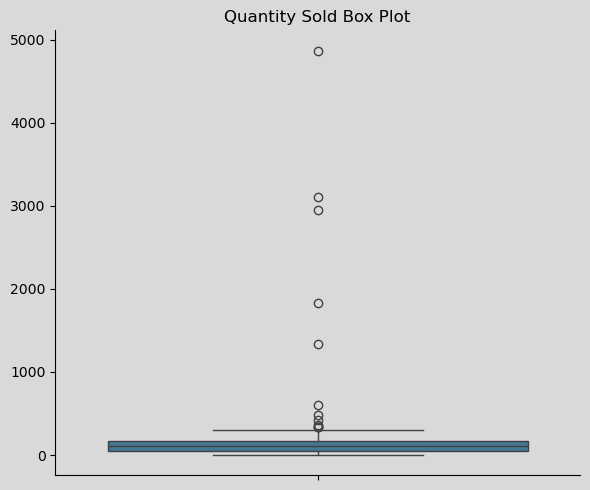

In [476]:
PlotBoxPlotV3_y(sell_df['sell_quantity'], "Quantity Sold Box Plot", 6, 5, "../visuals/1.QuantitySoldBoxPlot.svg")

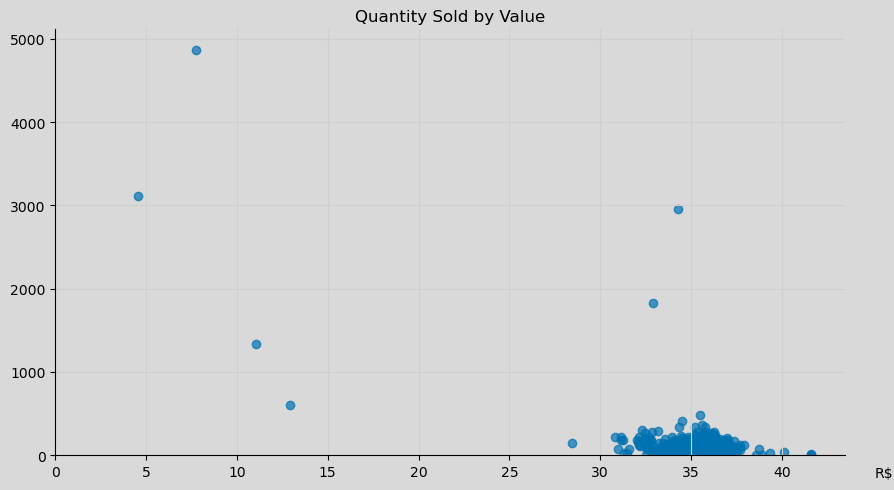

In [477]:
PlotScatter(sell_df['sell_value'], sell_df['sell_quantity'], "Quantity Sold by Value", "R$", "", 9, "xy", "../visuals/2.QuantitySoldByValue.svg")

In [478]:
sell_df = sell_df[sell_df['sell_value'] > 25]

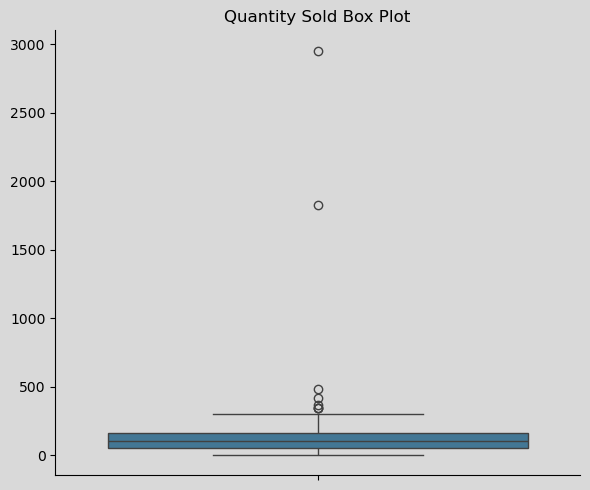

In [479]:
PlotBoxPlotV3_y(sell_df['sell_quantity'], "Quantity Sold Box Plot", 6, 5, "../visuals/3.QuantitySoldBoxPlot.svg")

#### **1.2 Sell Value**

In [481]:
sell_df.describe(include = ['float', 'int'])[['sell_value']]

,sell_value
count,381.000000
mean,35.164173
std,1.569592
min,28.430000
25%,34.290000
50%,35.350000
75%,36.020000
max,41.600000


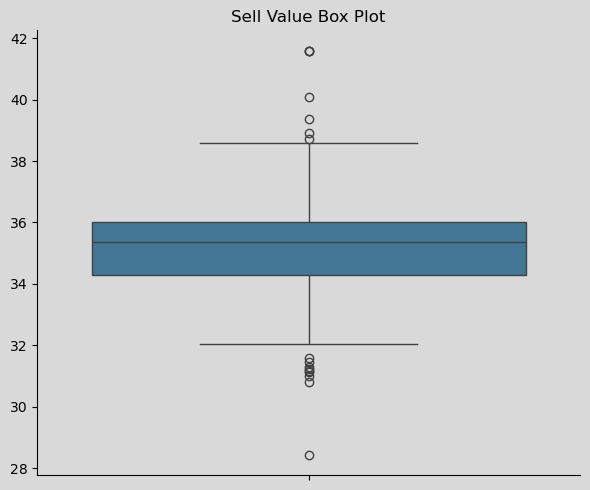

In [482]:
PlotBoxPlotV3_y(sell_df['sell_value'], "Sell Value Box Plot", 6, 5, "../visuals/4.SellValueBoxPlot.svg")

Although a few data points fall outside the interquartile range, the low standard deviation and the overall consistency of values suggest that no outlier treatment is required at this stage.

### **2. BUY_DF**

In [485]:
buy_df.describe(include = ['float', 'int'])

,buy_quantity,buy_value
count,164.000000,164.000000
mean,278.231707,28.384390
std,93.273830,1.410195
min,54.000000,23.430000
25%,240.000000,27.790000
50%,280.000000,28.300000
75%,280.000000,28.950000
max,640.000000,32.100000


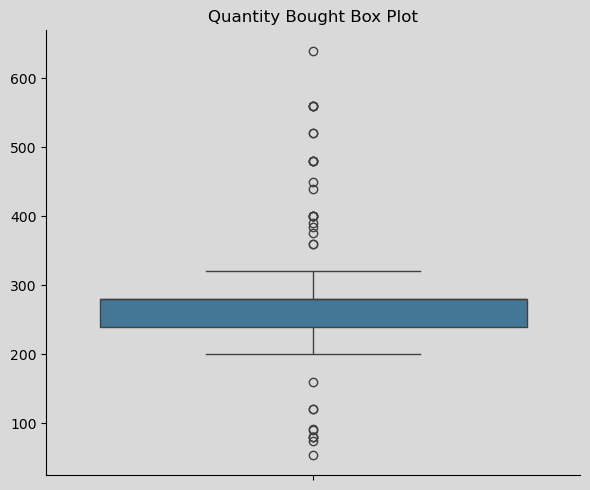

In [486]:
PlotBoxPlotV3_y(buy_df['buy_quantity'], "Quantity Bought Box Plot", 6, 5, "../visuals/5.QuantityBoughtBoxPlot.svg")

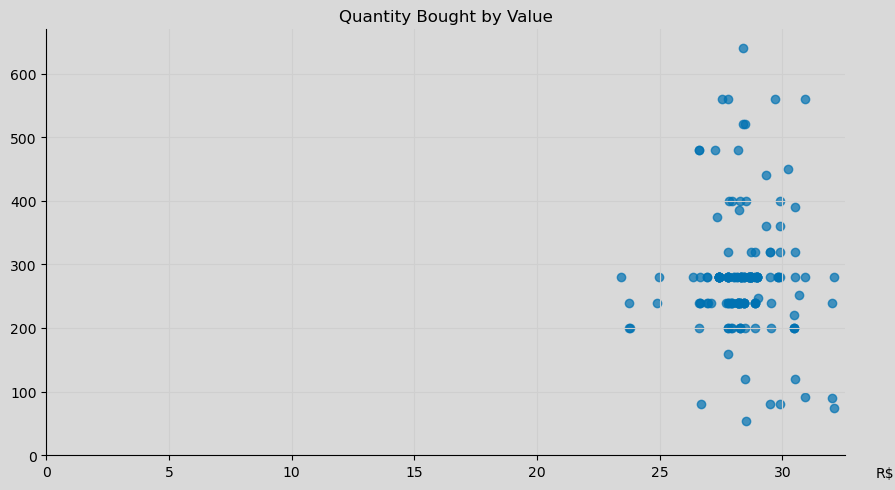

In [487]:
PlotScatter(buy_df['buy_value'], buy_df['buy_quantity'], "Quantity Bought by Value", "R$", "", 9, "xy", "../visuals/6.QuantityBoughtbyValueScatterPlot.svg")

An outlier analysis on `buy_quantity` revealed several points outside the interquartile range.<br>
However, when cross-referenced with the purchase price (`buy_value`), these higher quantities are clearly associated with lower prices, a plausible and strategic behavior in bulk purchasing.

As a result, no outliers were removed from this feature, in order to preserve patterns relevant for modeling price-volume relationships.

### **3. INVENTORY_DF**

In [490]:
initial_inv = inventory_df.loc[0, 'stock_count']

In [491]:
inventory_df = inventory_df.merge(sell_df[['date', 'sell_quantity']], on = 'date', how = 'left').fillna(0)
inventory_df = inventory_df.merge(buy_df[['date', 'buy_quantity']], on = 'date', how = 'left').fillna(0)

inventory_df['daily_balance'] = inventory_df['buy_quantity'] - inventory_df['sell_quantity']
inventory_df.loc[0, 'inventory'] = initial_inv

for i in range(1, len(inventory_df)):
    if (inventory_df.loc[i, 'stock_count'] == 0):
        inventory_df.loc[i, 'inventory'] = inventory_df.loc[i-1, 'inventory'] + inventory_df.loc[i, 'daily_balance']
    else:
        inventory_df.loc[i, 'inv_correction'] = inventory_df.loc[i-1, 'inventory'] + inventory_df.loc[i, 'daily_balance'] - inventory_df.loc[i, 'stock_count']
        inventory_df.loc[i, 'inventory'] = inventory_df.loc[i, 'stock_count']
    
inventory_df['inv_correction'] = inventory_df['inv_correction'].fillna(0)

inventory_df

,date,stock_count,sell_quantity,buy_quantity,daily_balance,inventory,inv_correction
0,2024-01-01,175.0,0.0,0.0,0.0,175.0,0.0
1,2024-01-02,0.0,163.0,280.0,117.0,292.0,0.0
2,2024-01-03,0.0,215.0,0.0,-215.0,77.0,0.0
3,2024-01-04,0.0,2953.0,240.0,-2713.0,-2636.0,0.0
4,2024-01-05,0.0,55.0,240.0,185.0,-2451.0,0.0
...,...,...,...,...,...,...,...
481,2025-04-26,0.0,0.0,0.0,0.0,475.0,0.0
482,2025-04-27,0.0,0.0,0.0,0.0,475.0,0.0
483,2025-04-28,0.0,39.0,0.0,-39.0,436.0,0.0
484,2025-04-29,0.0,107.0,0.0,-107.0,329.0,0.0


The inventory position was consolidated after the outlier analysis and treatment on purchase and sales datasets. This ensures that the input and output quantities used in the inventory calculation reflect realistic business behavior, avoiding distortions caused by anomalous or erroneous records.

In [493]:
inventory_df.describe(include = ['float', 'int'])[['stock_count', 'daily_balance', 'inventory']]

,stock_count,daily_balance,inventory
count,486.000000,486.000000,486.000000
mean,5.051440,-2.997942,214.763374
std,64.516628,190.382821,1420.814590
min,0.000000,-2713.000000,-3044.000000
25%,0.000000,-78.750000,108.000000
50%,0.000000,0.000000,431.500000
75%,0.000000,75.750000,1230.000000
max,1330.000000,585.000000,2104.000000


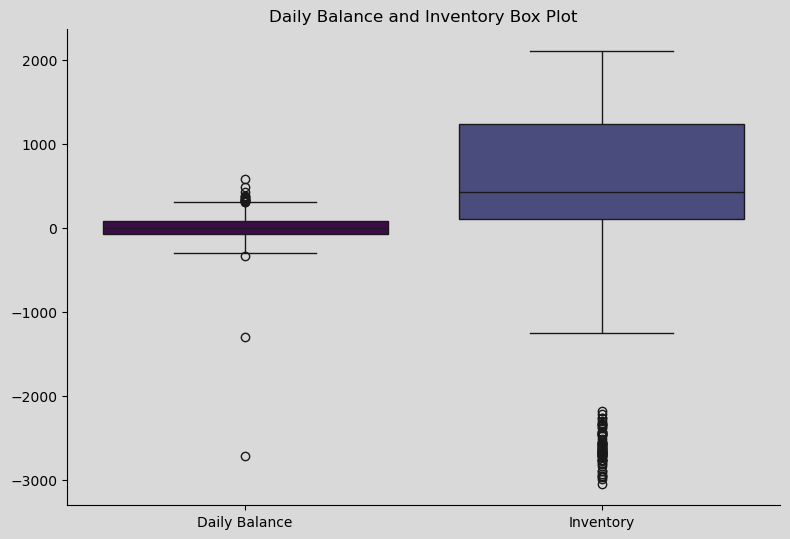

In [494]:
PB2(inventory_df[['daily_balance', 'inventory']], "Daily Balance", "Inventory", "Daily Balance and Inventory Box Plot", "../visuals/7.DailyBalanceInventoryBoxPlot.svg")

The `daily_balance` and `inventory` variables present extremely low minimum values when compared to their respective interquartile ranges and standard deviations. These anomalies may indicate data entry issues or propagation of previous errors, and therefore warrant further investigation before proceeding.

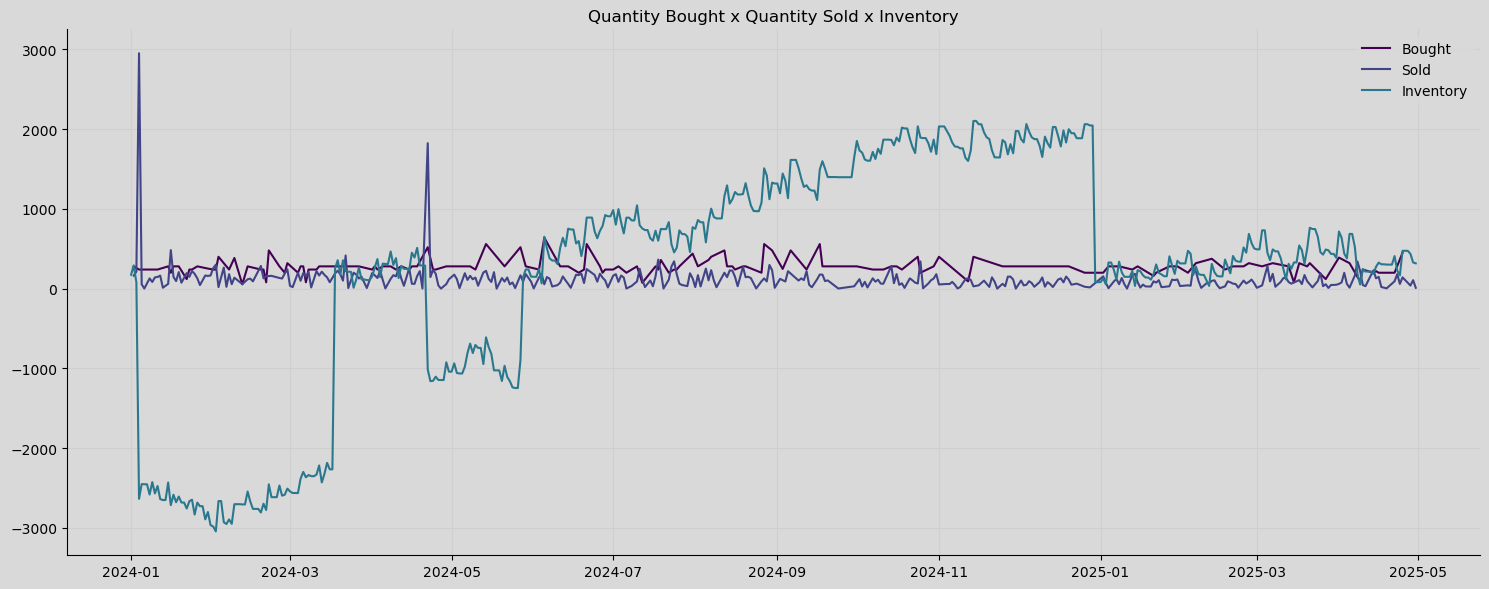

In [496]:
def PlotBSI(buy_df, sell_df, inventory_df, save):
    set_plot_style()

    plt.grid(visible = True, color = '0.81')
    plt.plot(buy_df['date'], buy_df['buy_quantity'], label = "Bought", color = corViridis[0])
    plt.plot(sell_df['date'], sell_df['sell_quantity'], label = "Sold", color = corViridis[1])
    plt.plot(inventory_df['date'], inventory_df['inventory'], label = "Inventory", color = corViridis[2])

    plt.title("Quantity Bought x Quantity Sold x Inventory")

    legend = plt.legend(loc = "upper right")
    legend.get_frame().set_facecolor('0.85')
    legend.get_frame().set_edgecolor('0.85')
                    
    plt.gcf().set_size_inches(15, 6)

    if (save != ""):
        plt.tight_layout()
        plt.savefig(save)
                    
    plt.show()
    plt.close()

PlotBSI(buy_df, sell_df, inventory_df, "../visuals/8.QuantityBoughtQuantitySoldInventoryLinePlot.svg")

Two extreme outliers in the `sell_quantity` feature are negatively impacting the inventory position, creating unrealistic negative values.

To correct this, let's apply a simple filter to exclude extreme cases:
- `sell_quantity` < 1000

In [498]:
sell_df = sell_df[sell_df['sell_quantity'] < 1000]

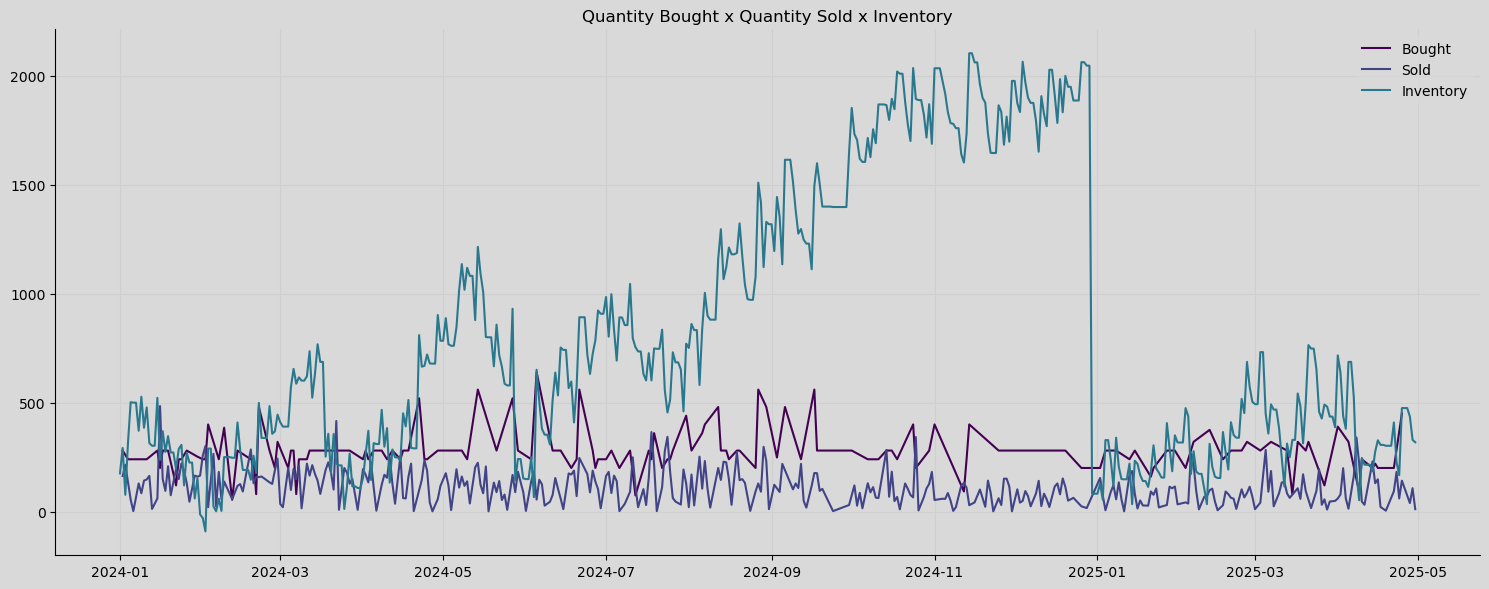

In [499]:
inventory_df = inventory_df.drop(columns = {'inventory', 'daily_balance', 'sell_quantity', 'buy_quantity'}, axis = 1)

inventory_df = inventory_df.merge(sell_df[['date', 'sell_quantity']], on = 'date', how = 'left').fillna(0)
inventory_df = inventory_df.merge(buy_df[['date', 'buy_quantity']], on = 'date', how = 'left').fillna(0)
inventory_df['daily_balance'] = inventory_df['buy_quantity'] - inventory_df['sell_quantity']

inventory_df.loc[0, 'inventory'] = initial_inv
inventory_df = inventory_df.drop('inv_correction', axis = 1)

for i in range(1, len(inventory_df)):
    if (inventory_df.loc[i, 'stock_count'] == 0):
        inventory_df.loc[i, 'inventory'] = inventory_df.loc[i-1, 'inventory'] + inventory_df.loc[i, 'daily_balance']
    else:
        inventory_df.loc[i, 'inv_correction'] = inventory_df.loc[i-1, 'inventory'] + inventory_df.loc[i, 'daily_balance'] - inventory_df.loc[i, 'stock_count']
        inventory_df.loc[i, 'inventory'] = inventory_df.loc[i, 'stock_count']
    
inventory_df['inv_correction'] = inventory_df['inv_correction'].fillna(0)

inventory_df = inventory_df.drop(columns = {'sell_quantity', 'buy_quantity'}, axis = 1)

PlotBSI(buy_df, sell_df, inventory_df, "../visuals/9.QuantityBoughtQuantitySoldInventoryLinePlot.svg")

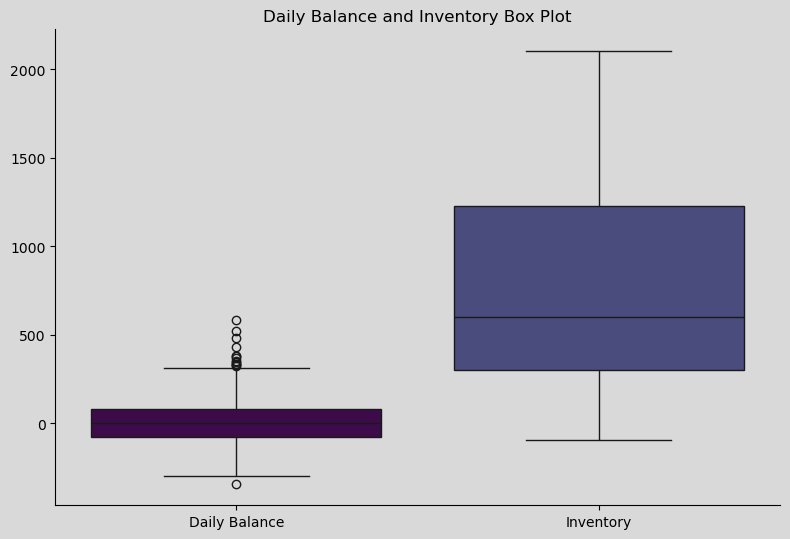

In [500]:
PB2(inventory_df[['daily_balance', 'inventory']], "Daily Balance", "Inventory", "Daily Balance and Inventory Box Plot", "../visuals/10.DailyBalanceInventoryBoxPlot.svg")

## **DATA CONSOLIDATION**

In [502]:
df = pd.date_range(start = '2024-01-01', end = '2025-04-30', freq = 'D')
df = pd.DataFrame({'date': df})

df = df.merge(sell_df, on = 'date', how = 'left') \
        .merge(buy_df, on = 'date', how = 'left') \
        .merge(inventory_df, on = 'date', how = 'left') \
        .merge(weather_df, on = 'date', how = 'left') \
        .merge(incc_df, on = 'date', how = 'left') \
        .merge(fuel_df, on = 'date', how = 'left') \
        .merge(holidays_df, on = 'date', how = 'left')

df['buy_value'] = df['buy_value'].fillna(method = 'ffill')
df['sell_quantity'] = df['sell_quantity'].fillna(0)
df['buy_quantity'] = df['buy_quantity'].fillna(0)

df = df.drop(columns = {'stock_count', 'inv_correction'}, axis = 1)

df.head()

,date,sell_quantity,sell_value,buy_quantity,buy_value,daily_balance,inventory,avg_temperature,precipitation,incc,fuel_price,is_holiday
0,2024-01-01,0.0,NaN,0.0,NaN,0.0,175.0,24.9,0.1,0.0027,6.04,1
1,2024-01-02,163.0,32.10,280.0,28.97,117.0,292.0,25.0,0.2,0.0027,6.04,0
2,2024-01-03,215.0,31.13,0.0,28.97,-215.0,77.0,24.8,4.9,0.0027,6.04,0
3,2024-01-04,0.0,NaN,240.0,28.43,240.0,317.0,24.8,0.0,0.0027,6.04,0
4,2024-01-05,55.0,35.50,240.0,28.43,185.0,502.0,25.1,0.0,0.0027,6.04,0


In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             486 non-null    datetime64[ns]
 1   sell_quantity    486 non-null    float64       
 2   sell_value       379 non-null    float64       
 3   buy_quantity     486 non-null    float64       
 4   buy_value        485 non-null    float64       
 5   daily_balance    486 non-null    float64       
 6   inventory        486 non-null    float64       
 7   avg_temperature  486 non-null    float64       
 8   precipitation    486 non-null    float64       
 9   incc             486 non-null    float64       
 10  fuel_price       486 non-null    float64       
 11  is_holiday       486 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 45.7 KB


In [504]:
df = df.astype({'daily_balance': 'int64', 'inventory': 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             486 non-null    datetime64[ns]
 1   sell_quantity    486 non-null    float64       
 2   sell_value       379 non-null    float64       
 3   buy_quantity     486 non-null    float64       
 4   buy_value        485 non-null    float64       
 5   daily_balance    486 non-null    int64         
 6   inventory        486 non-null    int64         
 7   avg_temperature  486 non-null    float64       
 8   precipitation    486 non-null    float64       
 9   incc             486 non-null    float64       
 10  fuel_price       486 non-null    float64       
 11  is_holiday       486 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 45.7 KB


# **SAVING PROCESSED DATASET**

In [506]:
df.to_csv('../data/processed/01_Data_Cleaning.csv', index = False)